### Open File

In [77]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
from collections import Counter
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, precision_score, recall_score

### Create Data Frame

In [79]:
df_model = pickle.load(open('./sav/df_model.sav', 'rb'))
df_subset = pickle.load(open('./sav/df_subset.sav', 'rb'))
df = df_model.drop(df_subset.index).sample(n=10000, random_state=11)

In [80]:
y = df['Category']
X = df[df.columns[1:-1]]

### Add Predictions

In [81]:
models = pickle.load(open('./sav/model_H.sav', 'rb'))

In [82]:
pred_knn = [Counter([y.iloc[k] for k in x]).most_common(1)[0][0] for x in models[0].query(X, k = 100)[1]]
pred_log = models[1].predict(X)
pred_svm = models[2].predict(X)
pred_tree = models[3].predict(X)
pred_rf = models[4].predict(X)
pred_gbt = models[5].predict(X)
pred_xgb = models[6].predict(X)
pred_cat = models[7].predict(X)

And I append the predictions of the model to the dataset

In [83]:
X.loc[:,'logistic'] = pred_log
X.loc[:,'gbt'] = pred_gbt
X.loc[:,'knn'] = pred_knn
X.loc[:,'svm'] = pred_svm
X.loc[:,'tree'] = pred_tree
X.loc[:,'xgb'] = pred_xgb
X.loc[:,'rf'] = pred_rf
X.loc[:,'cat'] = pred_cat

In [84]:
X.iloc[:,-8:] = X.iloc[:,-8:].apply(lambda x: [1 if i=='Good' else 0 for i in x])

## GBT
### Final Predictions

In [85]:
models = pickle.load(open('./sav/model_Hstack.sav', 'rb'))

In [86]:
clf = models[4]
pd.crosstab(clf.predict(X), y)

Category,Bad,Good
row_0,,
Bad,1205,3608
Good,430,4757


### Confidence Interval

In [87]:
pred_ac, pred_pr, pred_rc = [], [], []

In [88]:
np.random.seed(1)
for i in range(1000):
    sample = np.random.randint(0, len(X), size=len(X))
    X_sample = X.iloc[sample]
    y_sample = y.iloc[sample]
    print(i, end='\r', flush=True)
    pred_ac.append(accuracy_score(clf.predict(X_sample), y_sample))
    pred_rc.append(recall_score(clf.predict(X_sample), y_sample, pos_label="Bad"))
    pred_pr.append(precision_score(clf.predict(X_sample), y_sample, pos_label="Bad"))

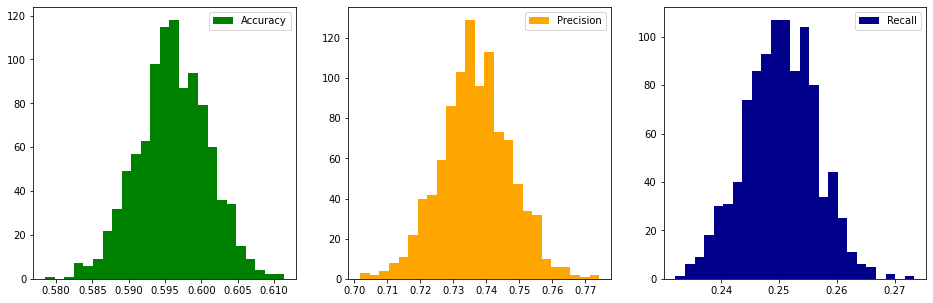

In [89]:
fig, ax=plt.subplots(1, 3, figsize=(16, 5))
ax[0].hist(pred_ac, bins=25, label='Accuracy', color='green')
ax[1].hist(pred_pr, bins=25, label='Precision', color='orange')
ax[2].hist(pred_rc, bins=25, label='Recall', color="darkblue")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [90]:
print('             0.5%    50%  99.5%')
print('Accuracy :',f'{np.percentile(pred_ac,0.5):.4f}',f'{np.percentile(pred_ac,50):.4f}',f'{np.percentile(pred_ac,99.5):.4f}')
print('Precision:',f'{np.percentile(pred_pr,0.5):.4f}',f'{np.percentile(pred_pr,50):.4f}',f'{np.percentile(pred_pr,99.5):.4f}')
print('Recall   :',f'{np.percentile(pred_rc,0.5):.4f}',f'{np.percentile(pred_rc,50):.4f}',f'{np.percentile(pred_rc,99.5):.4f}')

             0.5%    50%  99.5%
Accuracy : 0.5835 0.5961 0.6079
Precision: 0.7080 0.7365 0.7648
Recall   : 0.2352 0.2503 0.2660


## Random Forest
### Final Predictions

In [91]:
models = pickle.load(open('./sav/model_Hstack.sav', 'rb'))

In [92]:
clf = models[3]
pd.crosstab(clf.predict(X), y)

Category,Bad,Good
row_0,,
Bad,1119,3124
Good,516,5241


### Confidence Interval

In [93]:
pred_ac, pred_pr, pred_rc = [], [], []

In [94]:
np.random.seed(1)
for i in range(1000):
    sample = np.random.randint(0, len(X), size=len(X))
    X_sample = X.iloc[sample]
    y_sample = y.iloc[sample]
    print(i, end='\r', flush=True)
    pred_ac.append(accuracy_score(clf.predict(X_sample), y_sample))
    pred_rc.append(recall_score(clf.predict(X_sample), y_sample, pos_label="Bad"))
    pred_pr.append(precision_score(clf.predict(X_sample), y_sample, pos_label="Bad"))

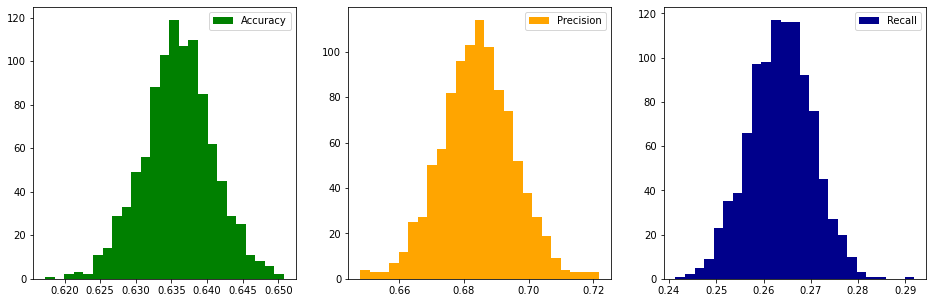

In [95]:
fig, ax=plt.subplots(1, 3, figsize=(16, 5))
ax[0].hist(pred_ac, bins=25, label='Accuracy', color='green')
ax[1].hist(pred_pr, bins=25, label='Precision', color='orange')
ax[2].hist(pred_rc, bins=25, label='Recall', color="darkblue")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [96]:
print('             0.5%    50%  99.5%')
print('Accuracy :',f'{np.percentile(pred_ac,0.5):.4f}',f'{np.percentile(pred_ac,50):.4f}',f'{np.percentile(pred_ac,99.5):.4f}')
print('Precision:',f'{np.percentile(pred_pr,0.5):.4f}',f'{np.percentile(pred_pr,50):.4f}',f'{np.percentile(pred_pr,99.5):.4f}')
print('Recall   :',f'{np.percentile(pred_rc,0.5):.4f}',f'{np.percentile(pred_rc,50):.4f}',f'{np.percentile(pred_rc,99.5):.4f}')

             0.5%    50%  99.5%
Accuracy : 0.6226 0.6360 0.6489
Precision: 0.6522 0.6842 0.7173
Recall   : 0.2470 0.2637 0.2801
